In [11]:
import psycopg2
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.sql import read_sql
from pyiem.util import get_dbconn

In [6]:
pgconn = get_dbconn('afos')
df = read_sql("""
    SELECT date(entered at time zone 'UTC') as dt,
    extract(hour from entered at time zone 'UTC') as hr, count(*) from products
    where source = 'KUNR' and entered > '2009-01-01' GROUP by dt, hr
""", pgconn, index_col=None)

In [14]:
data = np.zeros((24, 8*366))
base = datetime.date(2009, 1, 1)
for _, row in df.iterrows():
    x = int((row['dt'] - base).days)
    data[int(row['hr']), x] = row['count']

In [21]:
xticks = []
xticklabels = []
for i in range(3000):
    ts = base + datetime.timedelta(days=i)
    if ts.month == 1 and ts.day == 1:
        xticks.append(i)
        xticklabels.append(ts.year)

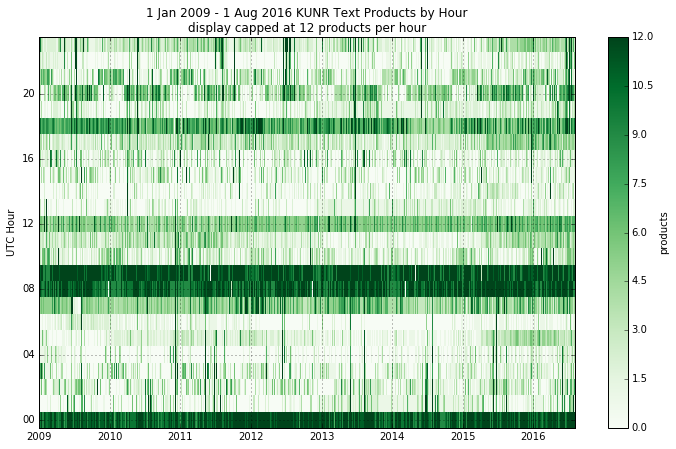

In [32]:
(fig, ax) = plt.subplots(1, 1, figsize=(12, 7))
res = ax.imshow(data, aspect='auto', interpolation='nearest',
               cmap=plt.get_cmap('Greens'), vmax=12)
fig.colorbar(res, label='products')
ax.set_ylim(-0.5, 23.5)
ax.set_yticks([0, 4, 8, 12, 16, 20])
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(['00', '04', '08', '12', '16', '20'])
ax.set_ylabel("UTC Hour")
xlim = int((datetime.date(2016, 8, 1) - base).days)
ax.set_xlim(0, xlim)
ax.grid(True)
ax.set_title(("1 Jan 2009 - 1 Aug 2016 KUNR Text Products by Hour\n"
             "display capped at 12 products per hour"))
fig.savefig('kunr_daily.png')